In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import itertools
from plotnine import *
import glob
from pandas.api.types import CategoricalDtype

# Make Plot

In [13]:
def average_tols(inst, system):
    tols = []
    path = f'./{system}/tolerances/{inst}/'
    for file in os.listdir(path):
        tols.append(np.load(path+file))
    
    return np.mean(tols, axis=0)

In [14]:
def make_df(time):
    data = {}
    data['Instrument'] = ['Piano'] * 4 + ['Cello'] * 4 + ['Violin'] * 4
    data['System'] = ['DTW-Chroma', 'SA-Chroma', 'SA-CQT', 'SA-BCQT'] * 3

    data['Error'] = []
    for inst in ['piano', 'cello', 'violin']:
        data['Error'].append(average_tols(inst, 'DTW-Chroma')[time]*100)
        data['Error'].append(average_tols(inst, 'SA-Chroma')[time]*100)
        data['Error'].append(average_tols(inst, 'SA-CQT')[time]*100)
        data['Error'].append(average_tols(inst, 'SA-BCQT')[time]*100)

    df = pd.DataFrame.from_dict(data)
    instrument_categories = CategoricalDtype(categories=["Piano", "Cello", "Violin"], ordered=True)
    df.Instrument = df.Instrument.astype(instrument_categories)
    system_categories = CategoricalDtype(categories=['DTW-Chroma', 'SA-Chroma', 'SA-CQT', 'SA-BCQT'], ordered=True)
    df.System = df.System.astype(system_categories)
    
    return df

In [15]:
df = make_df(200)
colors = ["#00BA38",  "#f8766d", "#619CFF", "#ffa500"]
ms100_df = make_df(100)
ms400_df = make_df(400)

In [16]:
(ggplot(df, aes(x="System", y="Error", fill="System")) +
    geom_bar(width = 0.8, position=position_dodge2(preserve='single', width=1), stat='identity') +
    scale_y_continuous(expand = [0, 0], limits = [0, 85]) +
    scale_fill_manual(values=colors) +
    geom_crossbar(ms100_df, aes(ymin="Error", ymax="Error")) +
    geom_crossbar(ms400_df, aes(ymin="Error", ymax="Error")) +
    facet_grid('. ~ Instrument') +
    theme_bw() + 
    labs(y = "Error Rate") +
    theme(dpi=300, legend_position=(0.5, 0.03), legend_direction="horizontal", legend_title_align='bottom', 
            legend_background=element_blank(),
            legend_title = element_text(size=10),
            strip_background = element_rect(fill="#ebebeb"),
            plot_title = element_text(size=14, colour='black', margin={'b': 12}),
            axis_text_x = element_blank(),
            axis_ticks_major_x = element_blank(),
            axis_text_y = element_text(size = 12, colour='black'), 
            axis_title_x = element_blank(),
            axis_title_y = element_text(size = 12.0, margin={'r': 6.0})) +
    guides(fill=guide_legend(title="System:", title_position='left', label_position="right", override_aes = {'size': 0}))).save('./PianoTrio.png')



/home/ibukey/anaconda3/envs/mir/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ibukey/anaconda3/envs/mir/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./fig2.png


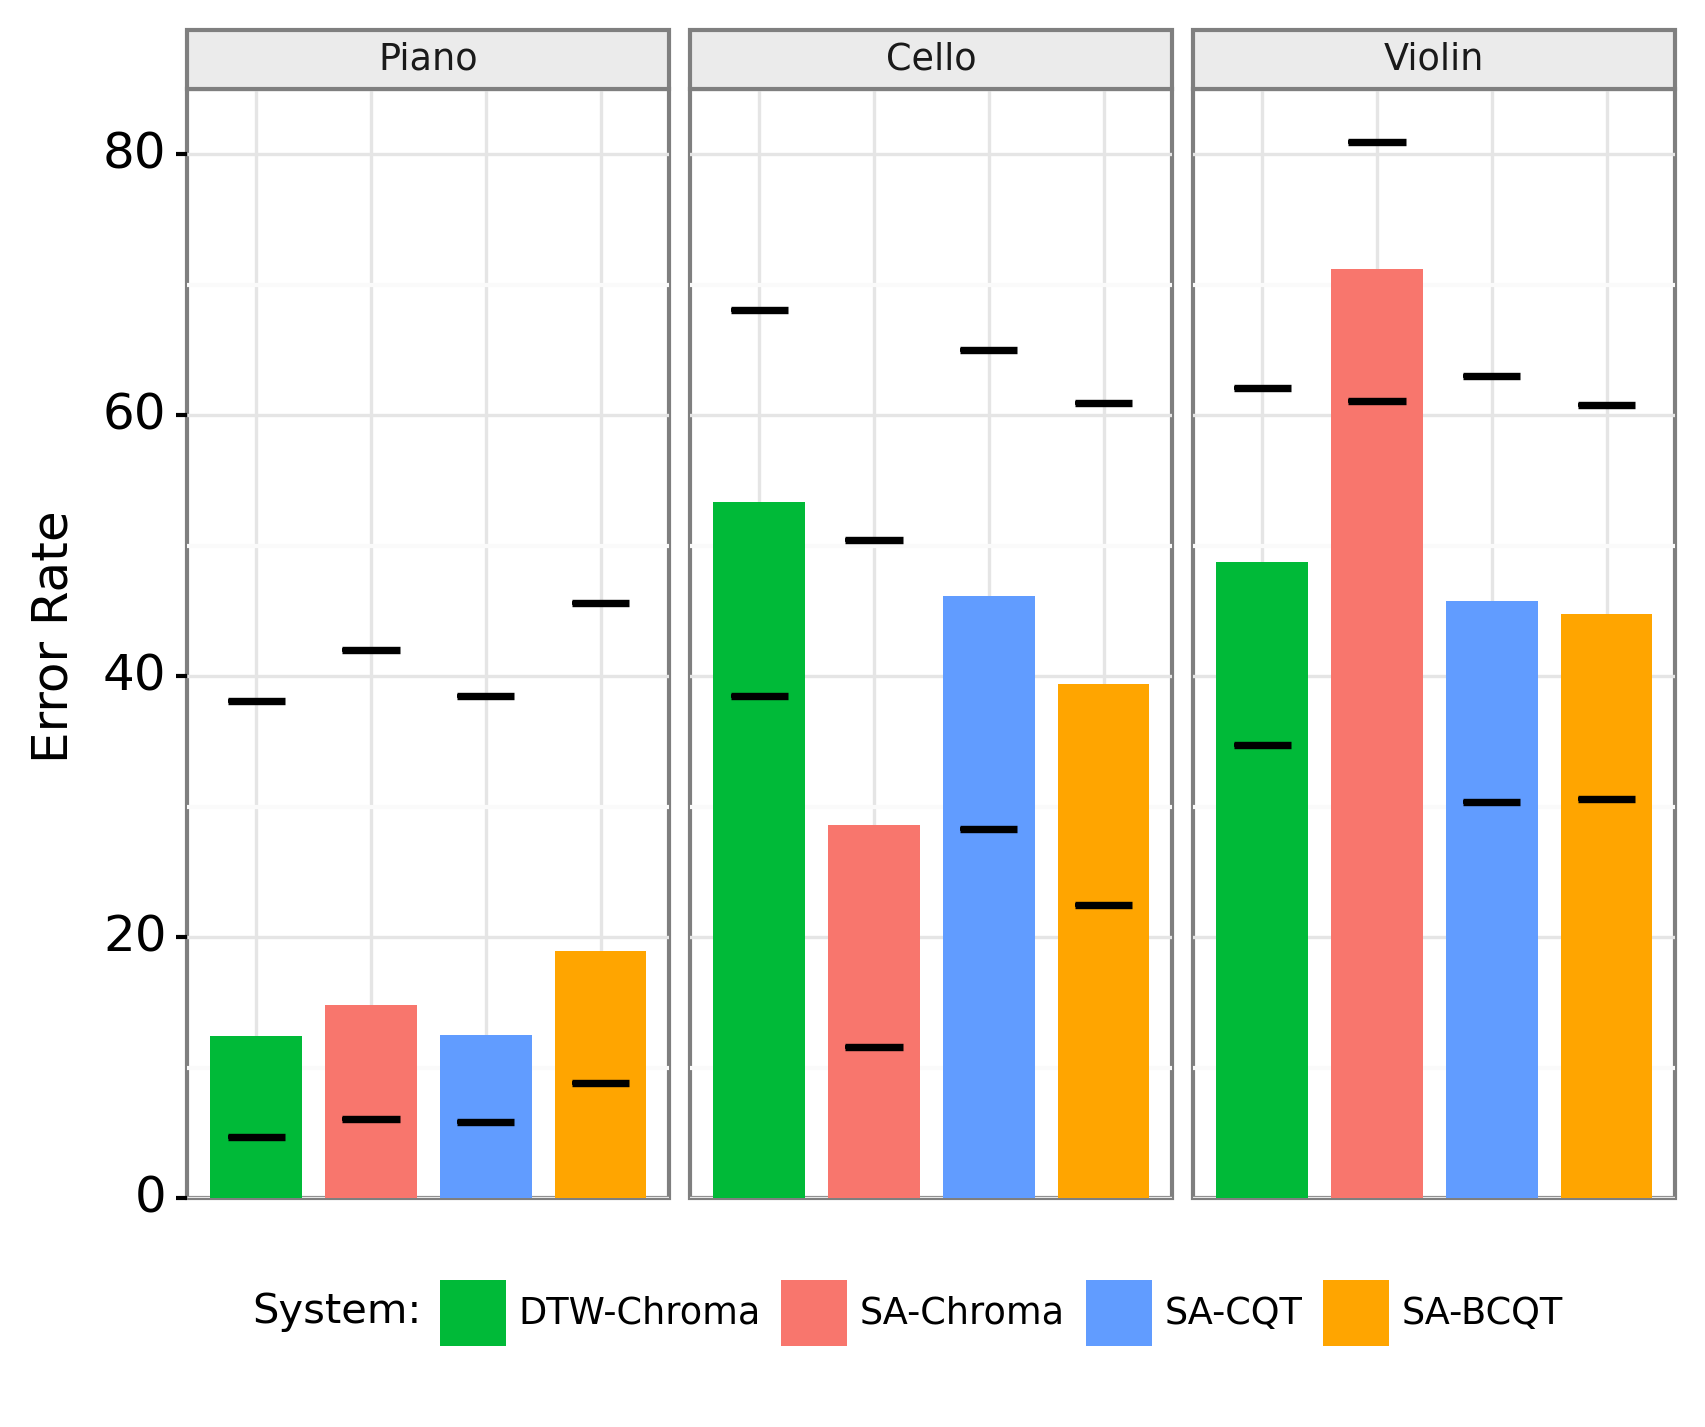

In [17]:
from PIL import Image
Image.open('./PianoTrio.png')